# Backtesting Strategy: Monthly Portfolio Rebalancing

In [133]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import copy
import matplotlib.pyplot as plt

## KPIs

In [134]:
def CAGR(DF):
    '''calculates the Cumulative Average Growth Rate of a monthly trading strategy'''
    df = DF.copy()
    df['cum_return'] = (1 + df.monthly_ret).cumprod()
    n = len(df)/12
    CAGR = (df.cum_return.tolist()[-1]**(1/n) - 1)
    return CAGR

In [135]:
def volatility(DF):
    '''calculates annualized volatility of a monthly trading strategy'''
    df = DF.copy()
    vol = df.monthly_ret.std() * np.sqrt(12)
    return vol

Sharpe Ratio: average return earned in excess of the risk-free rate per unit of volatility.

In [136]:
def sharpe(DF, rf=.02):
    '''calculates Sharpe Ratio; rf is the risk-free rate'''
    df = DF.copy()
    sr = (CAGR(df) - rf) / volatility(df)
    return sr

In [137]:
def max_dd(DF):
    '''calculates maximum drawdown of monthly returns'''
    df = DF.copy()
    df['cum_return'] = (1 + df.monthly_ret).cumprod()
    df['cum_roll_max'] = df.cum_return.cummax()
    df['drawdown'] = df.cum_roll_max - df.cum_return
    df['drawdown_pct'] = df.drawdown / df.cum_roll_max
    max_dd = df.drawdown_pct.max()
    return max_dd

## Get S&P500 Data

In [233]:
# get S&P500 constituents as of 11/5/2021
import datapackage

def get_data():
    data_url = 'https://datahub.io/core/s-and-p-500-companies/datapackage.json'

    # to load Data Package into storage
    package = datapackage.Package(data_url)

    # to load only tabular data
    resources = package.resources
    for resource in resources:
        if resource.tabular:
            data = pd.read_csv(resource.descriptor['path'])
            return data

In [24]:
spy_df = get_data()

In [25]:
# reformat tickers to match yahoofinance tickers
spy_df.Symbol = spy_df.Symbol.replace({'BRK.B':'BRK-B', 'BF.B':'BF-B'})

In [69]:
ohlc_m = {} # dict with monthly OHLCV dataframe for each stock
start = dt.datetime.today()-dt.timedelta(3650) # 10 years
end = dt.datetime.today()

tickers = spy_df.Symbol.to_list()

# loop over tickers and create df with close prices
for ticker in tickers:
    ohlc_m[ticker] = yf.download(ticker, start, end, interval='1mo')
    ohlc_m[ticker].dropna(inplace=True, how='all')

# redefine tickers after removing any tickers with corrupted data
tickers = ohlc_m.keys()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [174]:
len(tickers)

505

**Note that this simple backtesting strategy does not account for survivorship bias. For example, TSLA was introduced into the S&P500 on December 21, 2020, but this strategy will include TSLA performance from the past 10 years and will be compared to S&P500 returns over the same period. Note that for a time scale of 10 years, it will have severe impact.**

In [186]:
current_tsla_price = ohlc_m['TSLA']['Adj Close'][-1]
original_tsla_price = ohlc_m['TSLA']['Adj Close'][0]

tsla_cum_return = (current_tsla_price - original_tsla_price) / original_tsla_price
print(f'TSLA cumulative return from 2011-11-01 to 2021-11-05 is {round(tsla_cum_return*100,2)}%')

TSLA cumulative return from 2011-11-01 to 2021-11-05 is 18563.56%


## Calculate Returns

In [161]:
ohlc_dict = copy.deepcopy(ohlc_m)
returns_df = pd.DataFrame()
for ticker in tickers:
    print('Calculating monthly returns for ', ticker)
    ohlc_dict[ticker]['monthly_ret'] = ohlc_dict[ticker]['Adj Close'].pct_change()
    returns_df[ticker] = ohlc_dict[ticker]['monthly_ret'].fillna(0)
# returns_df.dropna(inplace=True)

Calculating monthly returns for  MMM
Calculating monthly returns for  AOS
Calculating monthly returns for  ABT
Calculating monthly returns for  ABBV
Calculating monthly returns for  ABMD
Calculating monthly returns for  ACN
Calculating monthly returns for  ATVI
Calculating monthly returns for  ADM
Calculating monthly returns for  ADBE
Calculating monthly returns for  AAP
Calculating monthly returns for  AMD
Calculating monthly returns for  AES
Calculating monthly returns for  AFL
Calculating monthly returns for  A
Calculating monthly returns for  APD
Calculating monthly returns for  AKAM
Calculating monthly returns for  ALK
Calculating monthly returns for  ALB
Calculating monthly returns for  ARE
Calculating monthly returns for  ALGN
Calculating monthly returns for  ALLE
Calculating monthly returns for  LNT
Calculating monthly returns for  ALL
Calculating monthly returns for  GOOGL
Calculating monthly returns for  GOOG
Calculating monthly returns for  MO
Calculating monthly returns for

Calculating monthly returns for  MPWR
Calculating monthly returns for  MNST
Calculating monthly returns for  MCO
Calculating monthly returns for  MS
Calculating monthly returns for  MSI
Calculating monthly returns for  MSCI
Calculating monthly returns for  NDAQ
Calculating monthly returns for  NTAP
Calculating monthly returns for  NFLX
Calculating monthly returns for  NWL
Calculating monthly returns for  NEM
Calculating monthly returns for  NWSA
Calculating monthly returns for  NWS
Calculating monthly returns for  NEE
Calculating monthly returns for  NLSN
Calculating monthly returns for  NKE
Calculating monthly returns for  NI
Calculating monthly returns for  NSC
Calculating monthly returns for  NTRS
Calculating monthly returns for  NOC
Calculating monthly returns for  NLOK
Calculating monthly returns for  NCLH
Calculating monthly returns for  NRG
Calculating monthly returns for  NUE
Calculating monthly returns for  NVDA
Calculating monthly returns for  NVR
Calculating monthly returns 

In [235]:
returns_df.tail()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-01,-0.016166,0.037871,0.048530,0.050099,0.112551,0.062421,-0.014949,0.004689,0.067677,-0.043431,...,0.071040,0.034171,0.007326,0.038374,0.083115,-0.002740,0.062790,-0.079366,0.110259,0.010453
2021-09-01,-0.092333,-0.160204,-0.065205,-0.106889,-0.105616,-0.049441,-0.060459,0.006106,-0.132560,0.029776,...,0.053190,-0.166585,-0.090909,-0.029565,-0.090756,-0.063065,-0.122196,-0.027185,0.068912,-0.050939
2021-10-01,0.018584,0.196496,0.091086,0.063039,0.020030,0.121499,0.010337,0.070488,0.129646,0.084872,...,0.042244,0.059587,0.033440,0.192132,0.055870,0.021503,0.035951,-0.020579,0.017774,0.113629
2021-11-01,0.017461,0.065957,-0.031343,0.034278,0.089357,0.030001,-0.132498,0.003892,0.019005,0.018668,...,-0.045278,0.079287,-0.012231,0.102833,0.003216,0.013927,0.137747,-0.010201,0.028893,0.003649
2021-11-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Create Portfolio

In [250]:
def pflio(DF, m, x, mult_alloc=True, print_pflio=True):
    '''returns cumulative portfolio returns
    
    Parameters
    ----------
    DF : dataframe with monthly return info for all stocks
    m : number of stocks in the portfolio (equally weighted)
    x : number of underperforming stocks to be removed from portfolio monthly
    mult_alloc : if True, allows for multiple allocations of the same stock
                 if False, only allows for unique stocks in portfolio each month
    print_pflio : if True, prints monthly rebalanced portfolio
    '''
    df = DF.copy()
    portfolio = []
    monthly_ret_list = [0]
    for i in range(len(df)):
        if len(portfolio) > 0:
            monthly_ret_list.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        if mult_alloc:
            new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        else:
            new_picks = df[[t for t in tickers if t not in portfolio]].iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio += new_picks
        if print_pflio:
            print(df.index.date[i], portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret_list), columns=['monthly_ret'])
    return monthly_ret_df

In [251]:
CAGR(pflio(returns_df, 10, 3))
sharpe(portfolio_returns(returns_df, 10, 3), 0.02)
max_dd(portfolio_returns(returns_df, 10, 3))

2011-12-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'NEE', 'WELL', 'WLTW', 'VTRS', 'MHK']
2012-01-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'WELL', 'MHK', 'NFLX', 'ILMN', 'AAL']
2012-02-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'MHK', 'ILMN', 'WHR', 'SWKS', 'STX']
2012-03-01 ['MPWR', 'COO', 'VRTX', 'WY', 'MHK', 'ILMN', 'STX', 'PNR', 'BAC', 'JPM']
2012-04-01 ['MPWR', 'COO', 'VRTX', 'WY', 'MHK', 'STX', 'JPM', 'AAL', 'EXPE', 'INCY']
2012-05-01 ['COO', 'VRTX', 'WY', 'MHK', 'AAL', 'EXPE', 'INCY', 'VRTX', 'AAL', 'UAL']
2012-06-01 ['WY', 'MHK', 'AAL', 'EXPE', 'INCY', 'AAL', 'UAL', 'STZ', 'MPC', 'CTRA']
2012-07-01 ['WY', 'MHK', 'EXPE', 'INCY', 'STZ', 'MPC', 'CTRA', 'TMUS', 'WDC', 'CNC']
2012-08-01 ['WY', 'MHK', 'STZ', 'MPC', 'TMUS', 'WDC', 'CNC', 'DXC', 'GNRC', 'GPS']
2012-09-01 ['WY', 'MHK', 'MPC', 'TMUS', 'DXC', 'GNRC', 'GPS', 'NOW', 'VMC', 'TMUS']
2012-10-01 ['WY', 'MHK', 'MPC', 'DXC', 'GNRC', 'GPS', 'VMC', 'GNRC', 'NFLX', 'URI']
2012-11-01 ['WY', 'MHK', 'MPC', 'DXC', 'VMC', 'NFLX', 'URI', 'MDLZ', 

0.0

In [220]:
# Calculate KPIs for SPY buy and hold strategy over the same period
SPY = yf.download('^GSPC', start, end, interval='1mo')
SPY['monthly_ret'] = SPY['Adj Close'].pct_change().fillna(0)
CAGR(SPY)
sharpe(SPY, 0.02)
max_dd(SPY)

[*********************100%***********************]  1 of 1 completed


0.20001050382463892

In [221]:
SPY.tail()

,Open,High,Low,Close,Adj Close,Volume,monthly_ret
Date,,,,,,,
2021-08-01,4406.859863,4537.359863,4367.729980,4522.680176,4522.680176,63217960000,0.028990
2021-09-01,4528.799805,4545.850098,4305.910156,4307.540039,4307.540039,66268850000,-0.047569
2021-10-01,4317.160156,4608.080078,4278.939941,4605.379883,4605.379883,61874700000,0.069144
2021-11-01,4610.620117,4718.500000,4595.060059,4697.529785,4697.529785,16397220000,0.020009
2021-11-05,4699.259766,4718.500000,4681.319824,4697.529785,4697.529785,2595129000,0.000000


Monthly Rebalanced Portfolios with Multiple Allocations:
2011-12-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'NEE', 'WELL', 'WLTW', 'VTRS', 'MHK']
2012-01-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'WELL', 'MHK', 'NFLX', 'ILMN', 'AAL']
2012-02-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'MHK', 'ILMN', 'WHR', 'SWKS', 'STX']
2012-03-01 ['MPWR', 'COO', 'VRTX', 'WY', 'MHK', 'ILMN', 'STX', 'PNR', 'BAC', 'JPM']
2012-04-01 ['MPWR', 'COO', 'VRTX', 'WY', 'MHK', 'STX', 'JPM', 'AAL', 'EXPE', 'INCY']
2012-05-01 ['COO', 'VRTX', 'WY', 'MHK', 'AAL', 'EXPE', 'INCY', 'VRTX', 'AAL', 'UAL']
2012-06-01 ['WY', 'MHK', 'AAL', 'EXPE', 'INCY', 'AAL', 'UAL', 'STZ', 'MPC', 'CTRA']
2012-07-01 ['WY', 'MHK', 'EXPE', 'INCY', 'STZ', 'MPC', 'CTRA', 'TMUS', 'WDC', 'CNC']
2012-08-01 ['WY', 'MHK', 'STZ', 'MPC', 'TMUS', 'WDC', 'CNC', 'DXC', 'GNRC', 'GPS']
2012-09-01 ['WY', 'MHK', 'MPC', 'TMUS', 'DXC', 'GNRC', 'GPS', 'NOW', 'VMC', 'TMUS']
2012-10-01 ['WY', 'MHK', 'MPC', 'DXC', 'GNRC', 'GPS', 'VMC', 'GNRC', 'NFLX', 'URI']
2012-11-01 [

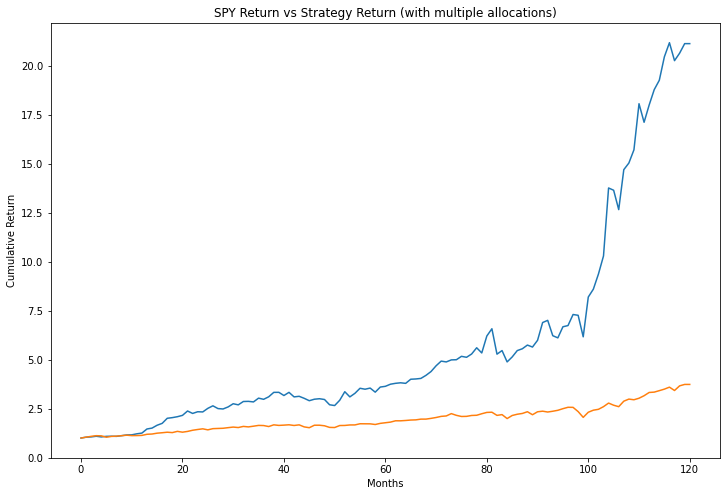

In [252]:
print('Monthly Rebalanced Portfolios with Multiple Allocations:')
plt.figure(figsize=(12,8))
plt.plot((1 + pflio(returns_df, 10, 3, mult_alloc=True, print_pflio=True)).cumprod())
plt.plot((1 + SPY['monthly_ret'].reset_index(drop=True)).cumprod())
plt.title('SPY Return vs Strategy Return (with multiple allocations)')
plt.ylabel('Cumulative Return')
plt.xlabel('Months')
ax.legend(['Strategy Return', 'SPY Return'])

Monthly Rebalanced Portfolios with Unique Allocations:
2011-12-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'NEE', 'WELL', 'WLTW', 'VTRS', 'MHK']
2012-01-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'WELL', 'MHK', 'NFLX', 'ILMN', 'AAL']
2012-02-01 ['MPWR', 'VMC', 'COO', 'VRTX', 'WY', 'MHK', 'ILMN', 'WHR', 'SWKS', 'STX']
2012-03-01 ['MPWR', 'COO', 'VRTX', 'WY', 'MHK', 'ILMN', 'STX', 'PNR', 'BAC', 'JPM']
2012-04-01 ['MPWR', 'COO', 'VRTX', 'WY', 'MHK', 'STX', 'JPM', 'AAL', 'EXPE', 'INCY']
2012-05-01 ['COO', 'VRTX', 'WY', 'MHK', 'AAL', 'EXPE', 'INCY', 'UAL', 'WMT', 'MNST']
2012-06-01 ['WY', 'MHK', 'AAL', 'EXPE', 'INCY', 'WMT', 'MNST', 'STZ', 'MPC', 'CTRA']
2012-07-01 ['WY', 'EXPE', 'INCY', 'WMT', 'STZ', 'MPC', 'CTRA', 'TMUS', 'WDC', 'CNC']
2012-08-01 ['WY', 'STZ', 'MPC', 'CTRA', 'TMUS', 'WDC', 'CNC', 'DXC', 'GNRC', 'GPS']
2012-09-01 ['WY', 'MPC', 'CTRA', 'TMUS', 'DXC', 'GNRC', 'GPS', 'NOW', 'VMC', 'FB']
2012-10-01 ['WY', 'MPC', 'CTRA', 'GNRC', 'GPS', 'VMC', 'FB', 'NFLX', 'URI', 'KMX']
2012-11-01 ['M

2020-04-01 ['TSLA', 'SWKS', 'ENPH', 'MRNA', 'DPZ', 'NLOK', 'CTRA', 'APA', 'MRO', 'DVN']
2020-05-01 ['TSLA', 'SWKS', 'ENPH', 'MRNA', 'DPZ', 'NLOK', 'CTRA', 'PENN', 'CZR', 'BBWI']
2020-06-01 ['TSLA', 'SWKS', 'MRNA', 'DPZ', 'PENN', 'CZR', 'BBWI', 'GPS', 'OXY', 'IVZ']
2020-07-01 ['TSLA', 'SWKS', 'MRNA', 'DPZ', 'PENN', 'BBWI', 'GPS', 'AMD', 'HCA', 'GNRC']
2020-08-01 ['TSLA', 'PENN', 'BBWI', 'GPS', 'AMD', 'HCA', 'GNRC', 'CZR', 'RCL', 'CRM']
2020-09-01 ['PENN', 'BBWI', 'GPS', 'GNRC', 'CZR', 'RCL', 'CRM', 'MLM', 'DRI', 'WRK']
2020-10-01 ['BBWI', 'GPS', 'GNRC', 'CRM', 'MLM', 'DRI', 'WRK', 'TPR', 'ALGN', 'UA']
2020-11-01 ['BBWI', 'GPS', 'DRI', 'WRK', 'TPR', 'ALGN', 'UA', 'MRNA', 'OXY', 'DVN']
2020-12-01 ['DRI', 'WRK', 'TPR', 'ALGN', 'UA', 'OXY', 'DVN', 'NLSN', 'ENPH', 'TSLA']
2021-01-01 ['TPR', 'UA', 'OXY', 'DVN', 'NLSN', 'ENPH', 'TSLA', 'MRNA', 'DISCA', 'DISCK']
2021-02-01 ['TPR', 'UA', 'OXY', 'DVN', 'NLSN', 'DISCA', 'DISCK', 'MRO', 'TWTR', 'RCL']
2021-03-01 ['TPR', 'UA', 'OXY', 'DVN', 'NLSN', 

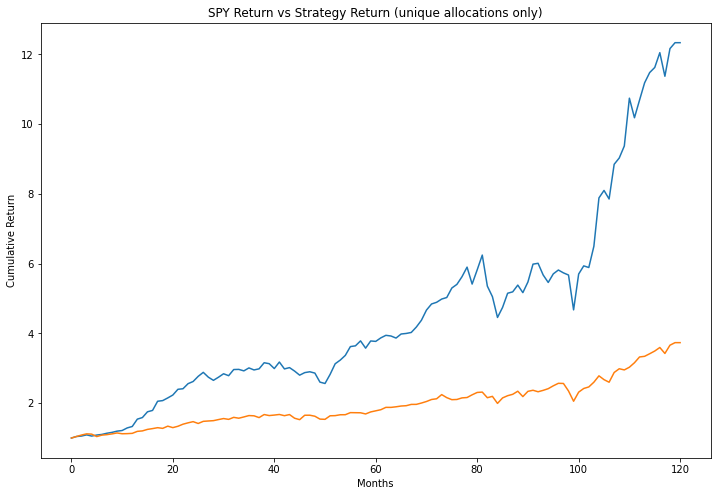

In [253]:
print('Monthly Rebalanced Portfolios with Unique Allocations:')
plt.figure(figsize=(12,8))
plt.plot((1 + pflio(returns_df, 10, 3, mult_alloc=False, print_pflio=True)).cumprod())
plt.plot((1 + SPY['monthly_ret'].reset_index(drop=True)).cumprod())
plt.title('SPY Return vs Strategy Return (unique allocations only)')
plt.ylabel('Cumulative Return')
plt.xlabel('Months')
ax.legend(['Strategy Return', 'SPY Return'])

## KPIs For S&P500

In [224]:
CAGR(SPY)

0.13961906138320934

In [225]:
sharpe(SPY)

0.9218616106731564

In [226]:
max_dd(SPY)

0.20001050382463892

## KPIs For Portfolio with Multiple Allocations

In [227]:
CAGR(pflio(returns_df, 10, 3, mult_alloc=True, print_pflio=False))

0.3532655594398211

In [228]:
sharpe(pflio(returns_df, 10, 3, mult_alloc=True, print_pflio=False), 0.02)

1.3426688108580132

In [229]:
max_dd(pflio(returns_df, 10, 3, mult_alloc=True, print_pflio=False))

0.25727906528653627

## KPIs for Portfolio with Unique Stocks Only

In [230]:
CAGR(pflio(returns_df, 10, 3, mult_alloc=False, print_pflio=False))

0.2829760535817245

In [231]:
sharpe(pflio(returns_df, 10, 3, mult_alloc=False, print_pflio=False), 0.02)

1.3032408091784238

In [232]:
max_dd(pflio(returns_df, 10, 3, mult_alloc=False, print_pflio=False))

0.2864249475942709

**Important Caveat: This long only stragegy will only perform well in a bull market. In a downtrending market, an analogous short only strategy should be implemented.**